## Mounting Colab to Drive

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Importing Necessary Libraries

In [44]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

## Reading Train and Test Datasets

In [3]:
train_data = pd.read_csv('/content/gdrive/MyDrive/DLA Final Project/Project/ECG200_TRAIN.tsv', sep = '\t', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/DLA Final Project/Project/ECG200_TEST.tsv', sep = '\t', header = None)

## Data Analysis and Visualization

In [4]:
print('Train Data has shape of', train_data.shape)
print('Test Data has shape of', test_data.shape)

Train Data has shape of (100, 97)
Test Data has shape of (100, 97)


In [5]:
print('Train Data has', train_data.isna().sum().sum(), 'null values')
print('Test Data has', test_data.isna().sum().sum(), 'null values')

Train Data has 0 null values
Test Data has 0 null values


In [6]:
#Train Data General Information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 97 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    int64  
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
 10  10      100 non-null    float64
 11  11      100 non-null    float64
 12  12      100 non-null    float64
 13  13      100 non-null    float64
 14  14      100 non-null    float64
 15  15      100 non-null    float64
 16  16      100 non-null    float64
 17  17      100 non-null    float64
 18  18      100 non-null    float64
 19  19      100 non-null    float64
 20  20      100 non-null    float64
 21  21      100 non-null    float64
 22  22 

In [7]:
#Test Data General Information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 97 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    int64  
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
 10  10      100 non-null    float64
 11  11      100 non-null    float64
 12  12      100 non-null    float64
 13  13      100 non-null    float64
 14  14      100 non-null    float64
 15  15      100 non-null    float64
 16  16      100 non-null    float64
 17  17      100 non-null    float64
 18  18      100 non-null    float64
 19  19      100 non-null    float64
 20  20      100 non-null    float64
 21  21      100 non-null    float64
 22  22 

In [8]:
#Train Data Statistical Measures
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.380000,0.708438,1.422151,2.039149,2.126455,1.551616,0.762251,0.282647,0.333630,0.372973,0.210769,0.028358,-0.166615,-0.335924,-0.590185,-0.678299,-0.774663,-0.841692,-0.934979,-1.032137,-1.069333,-1.167413,-1.251063,-1.299062,-1.384312,-1.442368,-1.515594,-1.550758,-1.556430,-1.601161,-1.554004,-1.537891,-1.487713,-1.367219,-1.267080,-1.103209,-0.949998,-0.791097,-0.576723,-0.400809,-0.243669,-0.087970,0.002005,0.120251,0.211009,0.287596,0.306730,0.336288,0.376139,0.371174,0.401358,0.422453,0.435402,0.468822,0.469670,0.489380,0.508073,0.535041,0.530799,0.509711,0.527180,0.518442,0.497247,0.469004,0.448324,0.450150,0.428762,0.433775,0.424235,0.385277,0.381293,0.383222,0.372921,0.411638,0.537512,0.594086,0.597308,0.581716,0.516997,0.436839,0.367566,0.315580,0.288794,0.240202,0.193665,0.187582,0.191175,0.190412,0.174286,0.205107,0.286484,0.412464,0.459377,0.389852,0.282864,0.182829,0.174863
std,0.929646,0.593513,0.927972,1.046880,1.098754,0.954734,0.963111,1.096712,0.877640,0.761753,0.739185,0.654959,0.595459,0.550339,0.517855,0.485875,0.486521,0.476875,0.457557,0.460175,0.427075,0.452474,0.460596,0.438882,0.449721,0.450459,0.461814,0.430900,0.484235,0.524430,0.571499,0.667664,0.708393,0.816313,0.809363,0.844314,0.850612,0.848596,0.872657,0.889971,0.910673,0.916654,0.942439,0.955204,0.897716,0.872291,0.839269,0.778202,0.703815,0.617973,0.557067,0.477022,0.415934,0.374973,0.325040,0.272938,0.251896,0.247616,0.242097,0.228852,0.242508,0.240313,0.223012,0.222670,0.234653,0.224981,0.253078,0.247018,0.266153,0.257266,0.260700,0.278487,0.282759,0.298346,0.315196,0.337168,0.366240,0.355458,0.330635,0.358290,0.375323,0.394503,0.416759,0.424774,0.430579,0.429081,0.396678,0.403825,0.434002,0.454395,0.589879,0.772104,0.871045,0.832312,0.665548,0.619799,0.413644
min,-1.000000,-0.706305,-1.100715,-1.321589,-1.076313,-1.247922,-1.482391,-1.598712,-1.508060,-1.609777,-1.600454,-1.689167,-1.395394,-1.577963,-1.639158,-1.714279,-1.797936,-1.871388,-1.958582,-2.170827,-2.140537,-2.235578,-2.329455,-2.509534,-2.436543,-2.540979,-2.602717,-2.592291,-2.567215,-2.617175,-2.444885,-2.297421,-2.331228,-2.402652,-2.261443,-2.453607,-2.207415,-2.257791,-2.179426,-1.963291,-1.975246,-1.849809,-1.996752,-1.997244,-1.738899,-1.617206,-1.716598,-1.797959,-1.629614,-1.450983,-1.427837,-1.423427,-1.312423,-1.132547,-0.929641,-0.717966,-0.538653,-0.417016,-0.294519,-0.134178,-0.029799,-0.047162,-0.106523,-0.090264,-0.095083,-0.110823,-0.151017,-0.111785,-0.131766,-0.142122,-0.043955,-0.290657,-0.096476,-0.176488,-0.277706,-0.261485,-0.910723,-0.424130,-0.206234,-1.048920,-0.665211,-0.407105,-0.507512,-0.716656,-0.527538,-0.576

In [9]:
#Test Data Statistical Measures
test_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.280000,0.778107,1.420520,1.930826,1.987732,1.431611,0.699987,0.182074,0.180556,0.268325,0.100887,-0.095240,-0.296454,-0.432582,-0.609654,-0.762522,-0.859458,-0.937121,-0.956791,-0.970401,-1.025613,-1.070482,-1.127013,-1.178271,-1.231038,-1.286730,-1.321581,-1.395918,-1.416992,-1.423922,-1.407927,-1.388088,-1.340133,-1.260683,-1.141041,-1.014849,-0.842235,-0.689638,-0.540271,-0.352221,-0.209460,-0.083867,0.024806,0.112395,0.180512,0.238351,0.274079,0.313632,0.322600,0.357662,0.363919,0.370598,0.401490,0.386612,0.419153,0.441098,0.437983,0.461973,0.464565,0.467103,0.453088,0.442354,0.438746,0.446426,0.413466,0.417414,0.434948,0.407392,0.433591,0.399503,0.409268,0.390733,0.391893,0.434354,0.494661,0.579246,0.591035,0.550135,0.493199,0.432585,0.376223,0.319499,0.289734,0.217529,0.200118,0.220815,0.174901,0.165110,0.165051,0.227733,0.354452,0.434472,0.409830,0.395148,0.289287,0.173945,0.181157
std,0.964836,0.715291,0.944463,1.153090,1.192668,1.115741,1.176571,1.283618,1.094534,0.928217,0.905123,0.811748,0.749379,0.735774,0.689292,0.663330,0.622182,0.515996,0.491822,0.480904,0.522114,0.554731,0.648113,0.684009,0.678232,0.673892,0.670834,0.681777,0.670859,0.689022,0.744069,0.741169,0.809798,0.849031,0.813869,0.818090,0.846151,0.820317,0.828343,0.880795,0.897800,0.935599,0.956227,0.972814,0.970653,0.920435,0.863578,0.829263,0.764532,0.686953,0.623954,0.569089,0.508131,0.457392,0.428468,0.416118,0.359832,0.346464,0.322632,0.311319,0.292525,0.276343,0.279548,0.277898,0.270567,0.246007,0.253849,0.270020,0.283666,0.280137,0.262588,0.281821,0.288558,0.315305,0.329827,0.345572,0.361703,0.323053,0.308304,0.312495,0.338801,0.384798,0.389734,0.422729,0.444324,0.414495,0.388402,0.397580,0.448105,0.515961,0.713155,0.823221,0.840228,0.811271,0.705257,0.584389,0.413389
min,-1.000000,-1.668193,-2.053335,-2.235332,-2.173837,-1.741502,-1.645442,-1.962966,-2.238767,-2.071550,-2.261594,-2.445409,-2.521803,-2.670337,-2.961496,-3.014451,-2.954427,-2.533932,-2.321099,-2.401157,-2.282220,-2.257804,-2.509492,-2.521835,-2.320244,-2.342957,-2.464459,-2.560607,-2.649804,-2.453185,-2.444519,-2.442007,-2.337949,-2.235914,-2.128440,-2.110513,-2.098527,-2.017522,-2.048919,-1.964045,-2.005615,-2.074156,-1.893848,-1.865932,-1.846461,-1.755601,-1.620427,-1.701248,-1.743375,-1.705955,-1.632277,-1.531491,-1.419390,-1.337758,-1.252245,-1.114703,-1.213913,-1.327738,-1.354267,-1.268590,-1.169734,-1.163080,-1.236563,-1.273067,-1.190781,-1.022881,-0.865770,-0.781114,-0.752205,-0.729192,-0.666347,-0.535405,-0.335468,-0.320826,-0.523848,-0.363309,-0.375341,-0.435042,-0.419153,-0.574543,-0.386227,-0.562537,-0.651143,-0.677705,-0.860913,-0.68

Although these are time series data points, we displayed statistical values for each columns to extract ranges and to get some useful intuition about the datasets.

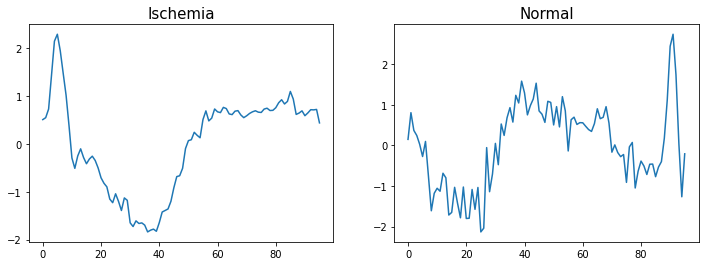

In [10]:
#Visualizing one Ischemia and one Normal data from train dataset

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

axs[0].plot(train_data.iloc[:, 1:].values[0])
axs[0].set_title('Ischemia', size = 15)
axs[1].plot(train_data.iloc[:, 1:].values[1])
axs[1].set_title('Normal', size = 15)
plt.show()

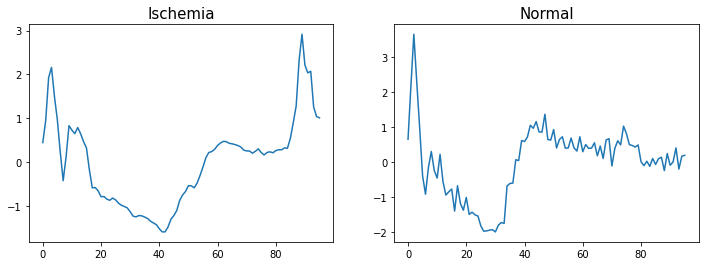

In [11]:
#Visualizing one Ischemia and one Normal data from test dataset

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

axs[0].plot(test_data.iloc[:, 1:].values[4])
axs[0].set_title('Ischemia', size = 15)
axs[1].plot(test_data.iloc[:, 1:].values[1])
axs[1].set_title('Normal', size = 15)
plt.show()

As it is the time series data and data of heartbeats over time, displaying line plot is a good choice to get understanding of normal and ischemia cases.

Let's, now, explore our target variable.

In [12]:
#Displaying unique value of target variable of each dataset
print('There are', train_data[0].nunique(), 'unique values in the target variable of train data, which are', train_data[0].unique())
print('There are', test_data[0].nunique(), 'unique values in the target variable of test data (as expected), which are', test_data[0].unique())

There are 2 unique values in the target variable of train data, which are [-1  1]
There are 2 unique values in the target variable of test data (as expected), which are [ 1 -1]


In both of the datasets, there are 2 unique values in the target variables. So, we will be dealing with binary classification problem in this project.

In [13]:
#Displaying distributions of each dataset
print('Distribution of target variable of train data is as below:\n', train_data[0].value_counts(), '\n')
print('Distribution of target variable of test data is as below:\n', test_data[0].value_counts())

Distribution of target variable of train data is as below:
  1    69
-1    31
Name: 0, dtype: int64 

Distribution of target variable of test data is as below:
  1    64
-1    36
Name: 0, dtype: int64


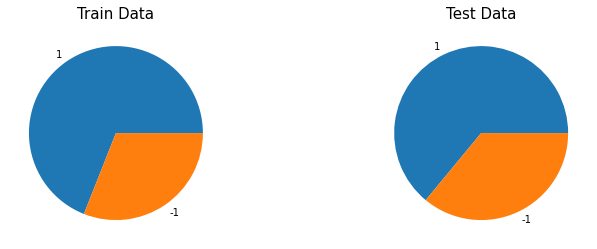

In [14]:
#Visualizing Distribution of Target variable of each dataset using Pie Chart
fig, axs = plt.subplots(1, 2, figsize = (12, 4))

axs[0].pie(train_data[0].value_counts().values, labels = train_data[0].value_counts().index)
axs[0].set_title('Train Data', size = 15)
axs[1].pie(test_data[0].value_counts().values, labels = test_data[0].value_counts().index)
axs[1].set_title('Test Data', size = 15)
plt.show()

Here, we explore some imbalancity in our datasets but with the proper model structures, we can handle it as they are not in that much problematic ratios.

## Data Preprocessing and Preparation for Modelling

In [15]:
#Replacing -1 values with 0 in both datasets. 0 for Ischemia and 1 for Normal cases
train_data[0] = train_data[0].replace([-1], 0)
test_data[0] = test_data[0].replace([-1], 0)

In [16]:
#Separating input (X) and output (y, target) features for both datasets
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

In [17]:
#Initializing Scaler and fitting X_train into it
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
#Transforming both inputs
sc_X_train = scaler.transform(X_train)
sc_X_test = scaler.transform(X_test)

In [19]:
#Creating dataframes for scaled inputs
sc_X_train = pd.DataFrame(data = sc_X_train, columns = X_train.columns)
sc_X_test = pd.DataFrame(data = sc_X_test, columns = X_test.columns)

In [20]:
#Getting number of classes before one hot encoding
nb_classes = y_train.nunique()

In [21]:
#One Hot Encoding Target variables because in modelling, we will use softmax activation function in the output layer
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

## Modelling

In this part, we will do 3 different modelling tasks including ANN, CNN, and RNN.

### ANN

In [22]:
#Building model structure

#Clearing backend session
keras.backend.clear_session()

#Getting shape for the input layer
input_shape = sc_X_train.shape[1:]

#Setting input layer
input_layer = keras.layers.Input(input_shape)

#Setting first dense layer and concatenating input layer to this layer
dense_layer_1 = keras.layers.Dense(96, activation = 'relu')(input_layer)

#Adding dropout layer to the model structure to handle overfitting by eliminating 10% of neuron in the previous layer
dropout_layer_1 = keras.layers.Dropout(rate = 0.1)(dense_layer_1)

#Setting second dense layer and concatenating previous dense layer to this layer
dense_layer_2 = keras.layers.Dense(48, activation = 'relu')(dropout_layer_1)

#Setting second dense layer and concatenating previous dense layer to this layer
dense_layer_3 = keras.layers.Dense(24, activation = 'relu')(dense_layer_2)

#Adding dropout layer to the model structure to handle overfitting by eliminating 20% of neuron in the previous layer
dropout_layer_2 = keras.layers.Dropout(rate = 0.2)(dense_layer_3)

#Setting third dense layer and concatenating previous dense layer to this layer
dense_layer_3 = keras.layers.Dense(24, activation = 'relu')(dropout_layer_2)

#Setting output layer
output_layer = keras.layers.Dense(units = nb_classes, activation = 'softmax')(dense_layer_3)

#Putting all together and making final model
model_ann = keras.models.Model(inputs = input_layer, outputs = output_layer)

In [23]:
#Getting model summary
model_ann.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96)]              0         
                                                                 
 dense (Dense)               (None, 96)                9312      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                4656      
                                                                 
 dense_2 (Dense)             (None, 24)                1176      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600   

In [24]:
#Compiling the model
model_ann.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics  = ['accuracy'])

In [25]:
#Setting Early Stopping callback to track the cases of overfitting
early_stopper = tf.keras.callbacks.EarlyStopping(patience = 25, monitor = 'val_loss', mode = 'min', verbose = True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('ann_best_model.h5', monitor = 'val_accuracy', mode = 'max', save_best_only = True, verbose = True)

In [26]:
#Training the model
history = model_ann.fit(sc_X_train, y_train, batch_size = 16, epochs = 100, callbacks = [early_stopper, model_checkpoint], validation_split = 0.2)

Epoch 1/100
1/5 [=====>........................] - ETA: 3s - loss: 0.7245 - accuracy: 0.6875
Epoch 1: val_accuracy improved from -inf to 0.55000, saving model to ann_best_model.h5
5/5 [==============================] - 1s 88ms/step - loss: 0.6676 - accuracy: 0.7125 - val_loss: 0.7146 - val_accuracy: 0.5500
Epoch 2/100
1/5 [=====>........................] - ETA: 0s - loss: 0.5842 - accuracy: 0.6875
Epoch 2: val_accuracy improved from 0.55000 to 0.65000, saving model to ann_best_model.h5
5/5 [==============================] - 0s 17ms/step - loss: 0.5085 - accuracy: 0.7625 - val_loss: 0.6111 - val_accuracy: 0.6500
Epoch 3/100
1/5 [=====>........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.8125
Epoch 3: val_accuracy improved from 0.65000 to 0.70000, saving model to ann_best_model.h5
5/5 [==============================] - 0s 18ms/step - loss: 0.4114 - accuracy: 0.8125 - val_loss: 0.5458 - val_accuracy: 0.7000
Epoch 4/100
1/5 [=====>........................] - ETA: 0s - loss: 0.3

#### Visualization of Loss and Accuracy of Train and Validation fractions over epochs

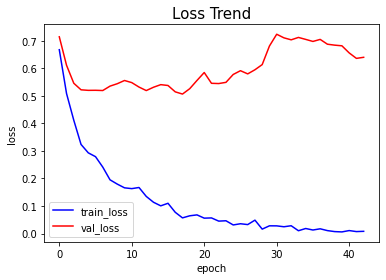

In [31]:
history_dict = history.history
loss_train_epochs = history_dict['loss']
loss_val_epochs = history_dict['val_loss']

plt.figure()
plt.plot(loss_train_epochs, color = 'blue', label = 'train_loss')
plt.plot(loss_val_epochs, color = 'red', label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('epoch-loss-ann.pdf')
plt.title('Loss Trend', size = 15)
plt.show()
plt.close()

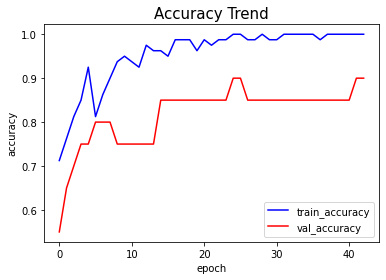

In [30]:
history_dict = history.history
accuracy_train_epochs = history_dict['accuracy']
accuracy_val_epochs = history_dict['val_accuracy']

plt.figure()
plt.plot(accuracy_train_epochs, color = 'blue', label = 'train_accuracy')
plt.plot(accuracy_val_epochs, color = 'red', label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy Trend', size = 15)
plt.savefig('epoch-accuracy-ann.pdf')
plt.show()
plt.close()

#### Loading Saved Best Model and Evaluation on Test Data

In [32]:
saved_ann = keras.models.load_model('ann_best_model.h5')

In [54]:
ann_loss, ann_acc = saved_ann.evaluate(sc_X_test, y_test, verbose = False)
print("Loss on Test Data:", ann_loss)
print("Accuracy on Test Data:", ann_acc)

Loss on Test Data: 0.49362415075302124
Accuracy on Test Data: 0.8799999952316284


#### Displaying Confusion Matrix and Classification Report

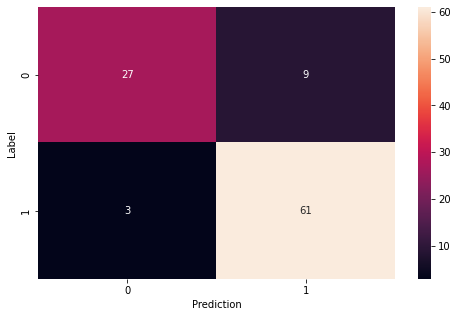

In [52]:
y_pred = np.argmax(saved_ann.predict(sc_X_test, verbose = False), axis = 1)
y_test_converted = np.where(y_test == 1)[1]

confusion_mtx  = confusion_matrix(y_test_converted, y_pred) 

plt.figure(figsize = (8, 5))
sns.heatmap(confusion_mtx, annot = True, fmt = 'g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [53]:
print(classification_report(y_test_converted, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.87      0.95      0.91        64

    accuracy                           0.88       100
   macro avg       0.89      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100



### CNN

We start with adding third dimension to train and test input data for CNN and also for RNN.

In [64]:
print('X_train Shape:', sc_X_train.shape, '\n', 'X_test Shape:', sc_X_test.shape, '\nbefore adding third dimension')
X_train_new_dim = np.expand_dims(sc_X_train.to_numpy(), axis = 2)
X_test_new_dim = np.expand_dims(sc_X_test.to_numpy(), axis = 2)
print('\nX_train Shape:', X_train_new_dim.shape, '\n', 'X_test Shape:', X_test_new_dim.shape, '\nafter adding third dimension')

X_train Shape: (100, 96) 
 X_test Shape: (100, 96) 
before adding third dimension

X_train Shape: (100, 96, 1) 
 X_test Shape: (100, 96, 1) 
after adding third dimension


In [91]:
#Building model structure

#Clearing backend session
keras.backend.clear_session()

#Getting shape for the input layer
input_shape = X_train_new_dim.shape[1:]

#Setting input layer
input_layer = keras.layers.Input(input_shape)

#Setting first convolutional layer and concatenating input layer to this layer
conv_layer_1 = keras.layers.Conv1D(filters = 128, padding = 'same', kernel_size = 8, strides = 1, activation = 'relu')(input_layer)

#Setting second convolutional layer and concatenating previous layer to this layer
conv_layer_2 = keras.layers.Conv1D(filters = 256, padding = 'same', kernel_size = 5, strides = 1, activation = 'relu')(conv_layer_1)

#Setting third convolutional layer and concatenating previous layer to this layer
conv_layer_3 = keras.layers.Conv1D(filters = 128, padding = 'same', kernel_size = 3, strides = 1, activation = 'relu')(conv_layer_2)

#Setting first pooling layer and concatenating previous layer to this layer
pooling_layer = keras.layers.GlobalAveragePooling1D()(conv_layer_3)

#Setting first dense layer and concatenating previous layer to this layer
dense_layer_1 = keras.layers.Dense(units = 64, activation = 'relu')(pooling_layer)

#Adding dropout layer to the model structure to handle overfitting by eliminating 10% of neuron in the previous layer
dropout_layer_1 = keras.layers.Dropout(rate = 0.1)(dense_layer_1)

#Setting second dense layer and concatenating previous layer to this layer
dense_layer_2 = keras.layers.Dense(units = 32, activation = 'relu')(dropout_layer_1)

#Adding another dropout layer to the model structure to handle overfitting by eliminating 10% of neuron in the previous layer
dropout_layer_2 = keras.layers.Dropout(rate = 0.1)(dense_layer_2)

#Setting third dense layer and concatenating previous layer to this layer
dense_layer_3 = keras.layers.Dense(units = 16, activation = 'relu')(dropout_layer_2)

#Setting output layer
output_layer = keras.layers.Dense(units = nb_classes, activation = 'softmax')(dense_layer_3)

#Putting all together and making final model
model_cnn = keras.models.Model(inputs = input_layer, outputs = output_layer)

In [92]:
#Getting model summary
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           1152      
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 256)           164096    
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           98432     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                             

In [93]:
#Compiling the model
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics  = ['accuracy'])

In [94]:
#Setting Early Stopping callback to track the cases of overfitting
early_stopper = tf.keras.callbacks.EarlyStopping(patience = 50, monitor = 'val_loss', mode = 'min', verbose = True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('cnn_best_model.h5', monitor = 'val_accuracy', mode = 'max', save_best_only = True, verbose = True)

In [95]:
#Training the model
history = model_cnn.fit(X_train_new_dim, y_train, batch_size = 16, epochs = 100, callbacks = [early_stopper, model_checkpoint], validation_split = 0.1)

Epoch 1/100
5/6 [========================>.....] - ETA: 0s - loss: 0.6903 - accuracy: 0.5875
Epoch 1: val_accuracy improved from -inf to 0.60000, saving model to cnn_best_model.h5
6/6 [==============================] - 1s 124ms/step - loss: 0.6902 - accuracy: 0.5889 - val_loss: 0.6988 - val_accuracy: 0.6000
Epoch 2/100
5/6 [========================>.....] - ETA: 0s - loss: 0.6453 - accuracy: 0.7250
Epoch 2: val_accuracy did not improve from 0.60000
6/6 [==============================] - 0s 70ms/step - loss: 0.6594 - accuracy: 0.7111 - val_loss: 0.7044 - val_accuracy: 0.6000
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 0.6408 - accuracy: 0.6889
Epoch 3: val_accuracy did not improve from 0.60000
6/6 [==============================] - 0s 76ms/step - loss: 0.6408 - accuracy: 0.6889 - val_loss: 0.6708 - val_accuracy: 0.6000
Epoch 4/100
5/6 [========================>.....] - ETA: 0s - loss: 0.6175 - accuracy: 0.7250
Epoch 4: val_accuracy did not improve from 0.60000
6/6

#### Visualization of Loss and Accuracy of Train and Validation fractions over epochs

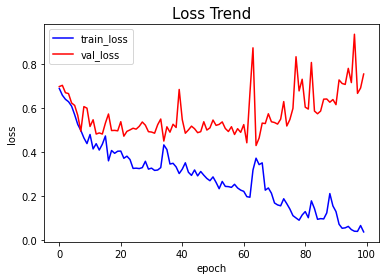

In [96]:
history_dict = history.history
loss_train_epochs = history_dict['loss']
loss_val_epochs = history_dict['val_loss']

plt.figure()
plt.plot(loss_train_epochs, color = 'blue', label = 'train_loss')
plt.plot(loss_val_epochs, color = 'red', label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('epoch-loss-cnn.pdf')
plt.title('Loss Trend', size = 15)
plt.show()
plt.close()

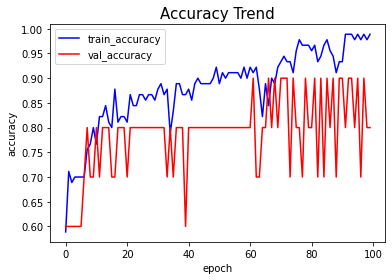

In [97]:
history_dict = history.history
accuracy_train_epochs = history_dict['accuracy']
accuracy_val_epochs = history_dict['val_accuracy']

plt.figure()
plt.plot(accuracy_train_epochs, color = 'blue', label = 'train_accuracy')
plt.plot(accuracy_val_epochs, color = 'red', label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy Trend', size = 15)
plt.savefig('epoch-accuracy-cnn.pdf')
plt.show()
plt.close()

#### Loading Saved Best Model and Evaluation on Test Data

In [98]:
saved_cnn = keras.models.load_model('cnn_best_model.h5')

In [100]:
cnn_loss, cnn_acc = saved_cnn.evaluate(X_test_new_dim, y_test, verbose = False)
print("Loss on Test Data:", cnn_loss)
print("Accuracy on Test Data:", cnn_acc)

Loss on Test Data: 0.47863301634788513
Accuracy on Test Data: 0.8700000047683716


#### Displaying Confusion Matrix and Classification Report

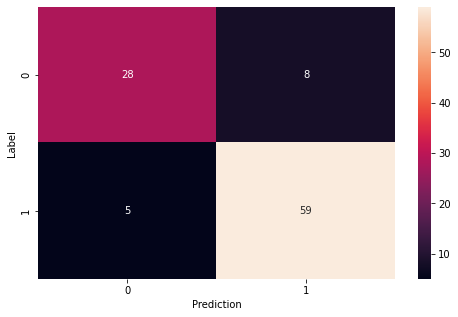

In [101]:
y_pred = np.argmax(saved_cnn.predict(X_test_new_dim, verbose = False), axis = 1)
y_test_converted = np.where(y_test == 1)[1]

confusion_mtx  = confusion_matrix(y_test_converted, y_pred) 

plt.figure(figsize = (8, 5))
sns.heatmap(confusion_mtx, annot = True, fmt = 'g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [102]:
print(classification_report(y_test_converted, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.88      0.92      0.90        64

    accuracy                           0.87       100
   macro avg       0.86      0.85      0.86       100
weighted avg       0.87      0.87      0.87       100



### RNN (LSTM)

In [174]:
#Building model structure

#Clearing backend session
keras.backend.clear_session()

#Getting shape for the input layer
input_shape = X_train_new_dim.shape[1:]

#Setting input layer
input_layer = keras.layers.Input(input_shape)

#Setting first LSTM layer and concatenating input layer to this layer
lstm_layer_1 = tf.keras.layers.LSTM(units = 48, return_sequences = True)(input_layer)

#Adding dropout layer to the model structure to handle overfitting by eliminating 20% of neuron in the previous layer
dropout_layer_1 = tf.keras.layers.Dropout(rate = 0.2)(lstm_layer_1)

#Setting second LSTM layer and concatenating previous layer to this layer
lstm_layer_2 = tf.keras.layers.LSTM(units = 24, return_sequences = True)(dropout_layer_1)

#Adding dropout layer to the model structure to handle overfitting by eliminating 10% of neuron in the previous layer
dropout_layer_2 = tf.keras.layers.Dropout(rate = 0.1)(lstm_layer_2)

#Setting third LSTM layer and concatenating previous layer to this layer
lstm_layer_3 = tf.keras.layers.LSTM(units = 12)(dropout_layer_2)

#Setting output layer
output_layer = keras.layers.Dense(units = nb_classes, activation = 'softmax')(lstm_layer_3)

#Putting all together and making final model
model_rnn = keras.models.Model(inputs = input_layer, outputs = output_layer)

In [175]:
#Getting model summary
model_rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 96, 48)            9600      
                                                                 
 dropout (Dropout)           (None, 96, 48)            0         
                                                                 
 lstm_1 (LSTM)               (None, 96, 24)            7008      
                                                                 
 dropout_1 (Dropout)         (None, 96, 24)            0         
                                                                 
 lstm_2 (LSTM)               (None, 12)                1776      
                                                                 
 dense (Dense)               (None, 2)                 26    

In [176]:
#Compiling the model
model_rnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics  = ['accuracy'])

In [177]:
#Setting Early Stopping callback to track the cases of overfitting
early_stopper = tf.keras.callbacks.EarlyStopping(patience = 50, monitor = 'val_loss', mode = 'min', verbose = True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('rnn_best_model.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = True)

In [178]:
#Training the model
history = model_rnn.fit(X_train_new_dim, y_train, batch_size = 16, epochs = 100, callbacks = [early_stopper, model_checkpoint], validation_split = 0.1)

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 0.6440 - accuracy: 0.7111
Epoch 1: val_loss improved from inf to 0.67224, saving model to rnn_best_model.h5
6/6 [==============================] - 8s 393ms/step - loss: 0.6440 - accuracy: 0.7111 - val_loss: 0.6722 - val_accuracy: 0.5000
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.5766 - accuracy: 0.7444
Epoch 2: val_loss improved from 0.67224 to 0.66627, saving model to rnn_best_model.h5
6/6 [==============================] - 1s 117ms/step - loss: 0.5766 - accuracy: 0.7444 - val_loss: 0.6663 - val_accuracy: 0.6000
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 0.5272 - accuracy: 0.7667
Epoch 3: val_loss improved from 0.66627 to 0.63511, saving model to rnn_best_model.h5
6/6 [==============================] - 1s 118ms/step - loss: 0.5272 - accuracy: 0.7667 - val_loss: 0.6351 - val_accuracy: 0.7000
Epoch 4/100
6/6 [==============================] - ETA: 0s - loss: 0.4797 - accu

#### Visualization of Loss and Accuracy of Train and Validation fractions over epochs

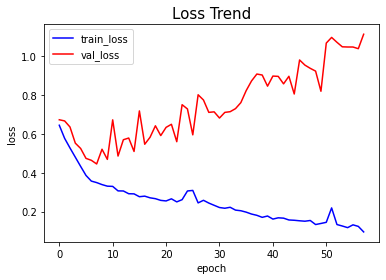

In [179]:
history_dict = history.history
loss_train_epochs = history_dict['loss']
loss_val_epochs = history_dict['val_loss']

plt.figure()
plt.plot(loss_train_epochs, color = 'blue', label = 'train_loss')
plt.plot(loss_val_epochs, color = 'red', label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('epoch-loss-rnn.pdf')
plt.title('Loss Trend', size = 15)
plt.show()
plt.close()

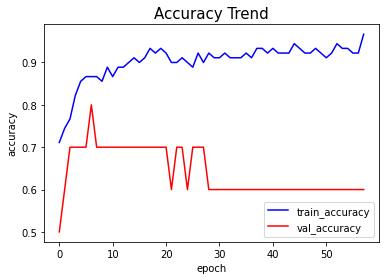

In [180]:
history_dict = history.history
accuracy_train_epochs = history_dict['accuracy']
accuracy_val_epochs = history_dict['val_accuracy']

plt.figure()
plt.plot(accuracy_train_epochs, color = 'blue', label = 'train_accuracy')
plt.plot(accuracy_val_epochs, color = 'red', label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy Trend', size = 15)
plt.savefig('epoch-accuracy-rnn.pdf')
plt.show()
plt.close()

#### Loading Saved Best Model and Evaluation on Test Data

In [181]:
saved_rnn = keras.models.load_model('rnn_best_model.h5')

In [182]:
rnn_loss, rnn_acc = saved_rnn.evaluate(X_test_new_dim, y_test, verbose = False)
print("Loss on Test Data:", rnn_loss)
print("Accuracy on Test Data:", rnn_acc)

Loss on Test Data: 0.4912062883377075
Accuracy on Test Data: 0.7699999809265137


#### Displaying Confusion Matrix and Classification Report

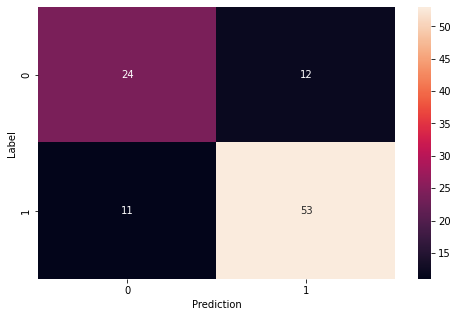

In [183]:
y_pred = np.argmax(saved_rnn.predict(X_test_new_dim, verbose = False), axis = 1)
y_test_converted = np.where(y_test == 1)[1]

confusion_mtx  = confusion_matrix(y_test_converted, y_pred) 

plt.figure(figsize = (8, 5))
sns.heatmap(confusion_mtx, annot = True, fmt = 'g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [184]:
print(classification_report(y_test_converted, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        36
           1       0.82      0.83      0.82        64

    accuracy                           0.77       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.77      0.77      0.77       100



## Comparison of Results

In [185]:
test_result_df = pd.DataFrame(data = np.array([[ann_loss, ann_acc],
                                               [cnn_loss, cnn_acc],
                                               [rnn_loss, rnn_acc]]), 
                              columns = ['Loss', 'Accuracy'], 
                              index = ['ANN', 'CNN', 'RNN'])

In [186]:
test_result_df

,Loss,Accuracy
ANN,0.493624,0.88
CNN,0.478633,0.87
RNN,0.491206,0.77


As a comparison, we can say that if we consider our main metrics as loss, then CNN is the best one for this data but in terms of accuracy, ANN is better than other models here. Currently, the loss is mostly used to optimize neural networks models which means that we consider CNN as the best model for this dataset.